In [1]:
#from sklearn.neighbors import NearestNeighbors
import numpy as np
import plotly.express as px
import pandas as pa
import json as js
import networkx as nx
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt

In [2]:
file = open('export.json',)
data = js.load(file)
elements = data["elements"]
file.close()

In [3]:
def haversine(point1, point2):
    point1[0], point1[1], point2[0], point2[1] = map(radians, [point1[0], point1[1], point2[0], point2[1]])

    # haversine formula 
    dlon = point2[0] - point1[0] 
    dlat = point2[1] - point1[1] 
    a = sin(dlat/2)**2 + cos(point1[1]) * cos(point2[1]) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [4]:
lat1 = radians(elements[0]["lat"])
lon1 = radians(elements[0]["lon"])

lat2 = radians(elements[1]["lat"])
lon2 = radians(elements[1]["lon"])

print(haversine([lon1,lat1],[lon2,lat2]))

0.0014464648901505678


In [5]:
#regroupe les coordonnées en couple
nodesMap = {}
for e in elements:
    if (e["type"] == "node"):
        if("tags" in e):
            if("name" in e["tags"]):
                if(e["tags"]["name"].startswith("Aire")):
                    print(e["id"],e["tags"]["name"])
                    point = [e["lat"],e["lon"],1]
                else:
                    point = [e["lat"],e["lon"],0]
            else:
                point = [e["lat"],e["lon"],0]

        else:
            point = [e["lat"],e["lon"],0]
        # ajout dans le dictionnaire
        nodesMap.update({e["id"] : point})

print(nodesMap[1092718161])

21462872 Aire de Meillac
21463090 Aire de Bordeaux-Cestas
36133148 Aire de Cocumont
101439017 Aire de Lugos-Est
244598847 Aire d'Aquitaine Nord
245469652 Aire de Thouars
245469945 Aire de Thouars
249778863 Aire des Vignes Nord
255725311 Aire de Saugon
257156240 Aire des Palombières
313750636 Aire de la Gare de Péage d'Arveyres
313753580 Aire des Palombières
315104278 Aire des Vignes Sud
315104887 Aire de la Gare de Péage d'Arveyres
318151675 Aire des Terres de Graves
318182389 Aire des Terres de Graves
458755211 Aire de Cocumont
513717312 Aire de Bordeaux-Cestas
726554853 Aire de l'Estalot
736942879 Aire de Lugos-Ouest
778654326 Aire du Bazadais
987039211 Aire du Bazadais
1091814886 Aire de Bédenac Ouest
1876595132 Aire de Saint-Caprais
1893894292 Aire de Cézac
2587088569 Aire de Boisredon
5761204260 Aire de Saugon
[44.2812476, -0.2325377, 0]


In [6]:
# créer un dictionnaire regroupant les coordonées des sations services/aires
points = {}
for e in elements:
    if (e["type"] == "way"):
        points.update({e["id"] : nodesMap[e["nodes"][0]]})

print(points)

#print(haversine(points.get(116545534),points.get(475295233)))

{4646237: [44.7799067, -0.5485072, 0], 5116814: [44.8079857, -0.5318097, 0], 5116827: [44.8050152, -0.5312477, 0], 5116828: [44.8055036, -0.5305562, 0], 5181895: [44.7727156, -0.5558113, 0], 5182230: [44.5450047, -0.2679919, 0], 5182232: [44.505076, -0.0397231, 0], 11398454: [44.4432662, -0.8108298, 0], 22929785: [44.805711, -0.5304623, 0], 22929794: [44.8096527, -0.524314, 0], 22929795: [44.8097643, -0.5243795, 0], 22929812: [44.8053627, -0.5307604, 0], 22929813: [44.8050902, -0.5313906, 0], 22929814: [44.8054312, -0.530887, 0], 22938590: [44.8845984, -0.5173074, 0], 22938594: [44.8787813, -0.5314682, 0], 22938722: [44.883181, -0.5539254, 0], 22938723: [44.8788637, -0.5314392, 0], 22938753: [44.8852241, -0.5614253, 0], 22938755: [44.8865621, -0.560586, 0], 22938796: [44.8880128, -0.5837678, 0], 22938798: [44.888159, -0.5838531, 0], 22938833: [44.8881627, -0.5859792, 0], 22938849: [44.8892865, -0.6000618, 0], 23133268: [45.0031393, -0.1273673, 0], 23133269: [45.0032155, -0.1274521, 0],

[5078638536, 22938755, 172481709]


{21457033: Text(0.19691398739814758, -0.4667356610298157, '21457033'),
 21457036: Text(0.18093281984329224, 0.02788672037422657, '21457036'),
 21462687: Text(0.29668256640434265, 0.010140275582671165, '21462687'),
 21462695: Text(0.05122809857130051, 0.04359472170472145, '21462695'),
 21462696: Text(-0.008414532989263535, -0.03459404781460762, '21462696'),
 21462701: Text(0.03648998588323593, -0.1543724685907364, '21462701'),
 21462703: Text(0.19322124123573303, -0.17664135992527008, '21462703'),
 21462704: Text(0.3118993937969208, -0.1532554030418396, '21462704'),
 21462706: Text(0.4912700355052948, -0.12282716482877731, '21462706'),
 21462714: Text(0.7297171354293823, -0.13373219966888428, '21462714'),
 21462717: Text(0.5965521931648254, -0.038454651832580566, '21462717'),
 21462724: Text(0.4377124309539795, 0.3150101900100708, '21462724'),
 21462727: Text(0.3079569935798645, 0.26667067408561707, '21462727'),
 21462737: Text(0.015784891322255135, 0.02508333884179592, '21462737'),
 21

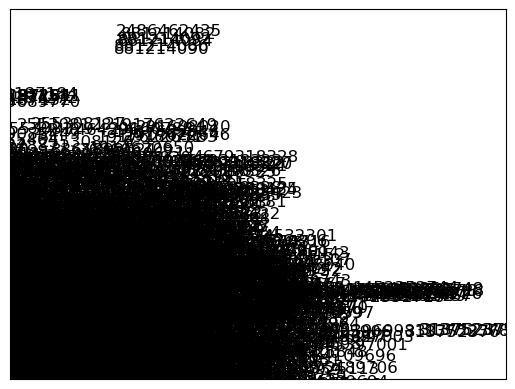

In [26]:
G = nx.Graph()

#TODO : Trouver un moyen de join les ways sans tout reparcourir.
# struct du map : (idNode,[nextNode,idWay1,<optional>idWay2])
nodeJunction = {}


# parcourir les types "way"
for nodes in elements:
    if (nodes["type"] == "way"):
        for i in range(len(nodes["nodes"])):

            if nodes["nodes"][i] in nodeJunction:
                if i == 0 : 
                  nodeJunction[nodes["nodes"][i]][0]=nodes["nodes"][i+1]  
                nodeJunction[nodes["nodes"][i]][2]=nodes["id"]

                # ({nodes["nodes"][i] : [ _,_ ,nodes["id"]]})

            elif i == (len(nodes["nodes"])-1):
                nodeJunction.update({nodes["nodes"][i] : [None,nodes["id"],None]})


            else : nodeJunction.update({nodes["nodes"][i] : [nodes["nodes"][i+1],nodes["id"],None]})
            # if (nodesMap[node][2] == 1):
            #     print(node,nodesMap[node])
print(nodeJunction[1833874724])

    #print(nodesMap[node[0]][0])
xpoints = []
ypoints = []
for node in nodeJunction.items():

        xpoints.append(nodesMap[node[0]][0])
        ypoints.append(nodesMap[node[0]][1])

latitude = np.array(xpoints)
longitude = np.array(ypoints)

#plt.scatter(longitude,latitude,s=1)
#plt.show()
#TODO : Créer un graphe simplifié des ways et calculer la distance entre 2 aires


#PRINT NODE GRAPH

# for i in nodes.items():
#     lat = i[1][0]
#     lon = i[1][1]
#     id = i[0]
#     G.add_node(id)
#     j+=1
#     if j>500 :
#         break

edge = []

for node in nodeJunction :
    #print(node,nodeJunction[node][0])
    if(nodeJunction[node][0]==None) : 
        pass
    else : edge.append(tuple((node,nodeJunction[node][0])))

#print(edge)
G.add_nodes_from(nodesMap)

G.add_edges_from(edge)
pos = nx.spring_layout(G)

#nx.draw_networkx_labels(G,pos)